# 精准率和召回率的平衡

In [2]:
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1 #让标签为9的变成1 关注点
y[digits.target!=9] = 0 # 其余标签变成 0
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)


In [20]:
log = LogisticRegression(solver="lbfgs")
log.fit(X_train,y_train)
log.score(X_test,y_test)

/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9755555555555555

In [17]:
 # 返回score 即返回计算出的值

In [24]:
# 基于不同的值进行决策边界
scores = log.decision_function(X_test) # 返回score 即返回计算出的值

## 精准率召回率曲线

In [38]:
from sklearn.metrics import precision_score,recall_score,roc_curve
precission , recall = [],[]
thresholders = np.arange(np.min(scores),np.max(scores),0.1)

In [30]:
for threshloder in thresholders:
    predict = np.array(scores >= threshloder,dtype='int')
    precission.append(precision_score(y_test,predict))
    recall.append(recall_score(y_test,predict))

In [31]:
import matplotlib.pyplot as plt

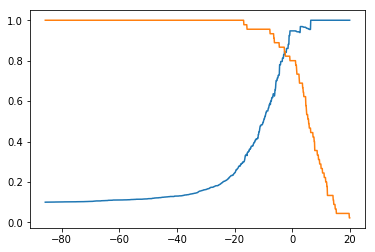

In [32]:
plt.plot(thresholders,precission)
plt.plot(thresholders,recall)

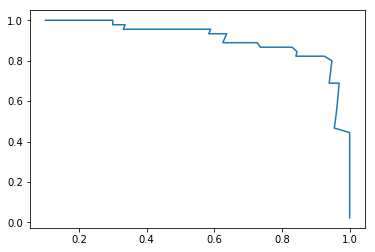

In [33]:
plt.plot(precission,recall)

### scikit-learn 中的精确率和召回率的计算 

In [36]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshoulsers = precision_recall_curve(y_test,scores)

## ROC曲线

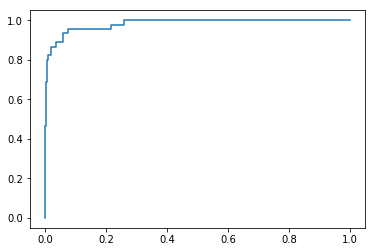

In [40]:
frps,trps,thresholders = roc_curve(y_test,scores)
plt.plot(frps,trps)

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAD8CAYAAACMwORRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAADvxJREFUeJzt3X+IZWd9x/H3x92mUpqY2h0h7g93SzfgGIqRIYkINaItm4C7/1jZlWAtwa22sX8ohRRLlPhPq7RSYVtdrPgDYoz+YQZZCdRGLOJuM+Ia3Q0p040mk4RmNGn8QzSGfvvHvTGX2dm5Z2buzJ37zPsFA/ec88y932fvnU+ePOc596SqkCS15SXjLkCSNHqGuyQ1yHCXpAYZ7pLUIMNdkhpkuEtSgwx3SWqQ4S5JDTLcJalBO8f1wrt27ar9+/eP6+UlaSJ997vf/UlVTQ1rN7Zw379/P3Nzc+N6eUmaSEl+3KWd0zKS1CDDXZIaZLhLUoMMd0lqkOEuSQ0aGu5JPpPkqSQ/vMTxJPlEkvkkDyZ53ejLlCStRpeR+2eBQyscvwk42P85DvzL+suSJK3H0HXuVfWtJPtXaHIE+Hz17td3OsmVSa6qqidHVKNG5K4zj3Lv2cfHXYa07U2/8go+9NbXbOhrjGLOfTfw2MD2Qn/fRZIcTzKXZG5xcXEEL63VuPfs45x/8mfjLkPSJhjFFapZZt+yd92uqpPASYCZmRnvzD0G01ddwZf+/PXjLkPSBhvFyH0B2DuwvQd4YgTPK0lao1GE+yzwzv6qmRuAZ51vl6TxGjotk+SLwI3AriQLwIeA3wCoqk8Cp4CbgXng58CfbVSxetFaTo6ef/JnTF91xQZVJGkr6bJa5tiQ4wX85cgqUicvnBxdTVhPX3UFR1677LluSY0Z21f+av08OSrpUvz6AUlqkCP3AZN0kY/z55JW4sh9wCRd5OP8uaSVOHJfwnlsSS1w5C5JDdq2I/fl5tedx5bUim07cl9uft15bEmt2LYjd3B+XVK7tu3IXZJaZrhLUoMMd0lqkOEuSQ0y3CWpQYa7JDWo6aWQK30RmBcsSWpZ0yP3lb4IzAuWJLWs6ZE7eKGSpO2p6ZG7JG1XhrskNaiZaRm/5VGSXtTMyN1veZSkFzUzcgdPnkrSC5oZuUuSXmS4S1KDDHdJapDhLkkNMtwlqUETvVpmcG27a9ol6UUTPXIfXNvumnZJelGnkXuSQ8A/ATuAT1fV3y05vg/4HHBlv83tVXVqxLUuy7XtknSxoSP3JDuAE8BNwDRwLMn0kmZ/C9xTVdcCR4F/HnWhkqTuukzLXAfMV9WFqnoOuBs4sqRNAS9MeL8MeGJ0JUqSVqtLuO8GHhvYXujvG/Rh4JYkC8Ap4H0jqW4Fd515lDOPPL3RLyNJE6lLuGeZfbVk+xjw2araA9wMfCHJRc+d5HiSuSRzi4uLq692wAurZDyJKkkX6xLuC8Dege09XDztcitwD0BVfQd4KbBr6RNV1cmqmqmqmampqbVVPOD6Ay/nHdfvW/fzSFJruoT7A8DBJAeSXEbvhOnskjaPAm8GSPJqeuG+vqG5JGnNhoZ7VT0P3AbcBzxEb1XMuSR3Jjncb/YB4N1Jvg98EXhXVS2dupEkbZJO69z7a9ZPLdl3x8Dj88AbRluaJGmtJvoKVUnS8gx3SWqQ4S5JDTLcJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoMMd0lqkOEuSQ0y3CWpQYa7JDXIcJekBhnuktQgw12SGjSR4X7XmUc588jT4y5DkrasiQz3e88+DsCR1+4ecyWStDVNZLgDXH/g5bzj+n3jLkOStqSJDXdJ0qUZ7pLUIMNdkhpkuEtSgwx3SWqQ4S5JDTLcJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoM6hXuSQ0keTjKf5PZLtHl7kvNJziW5a7RlSpJWY+ewBkl2ACeAPwIWgAeSzFbV+YE2B4G/Ad5QVc8kecVGFSxJGq7LyP06YL6qLlTVc8DdwJElbd4NnKiqZwCq6qnRlilJWo0u4b4beGxge6G/b9DVwNVJvp3kdJJDyz1RkuNJ5pLMLS4urq1iSdJQXcI9y+yrJds7gYPAjcAx4NNJrrzol6pOVtVMVc1MTU2ttlZJUkddwn0B2DuwvQd4Ypk291bVr6rqEeBhemEvSRqDLuH+AHAwyYEklwFHgdklbb4KvAkgyS560zQXRlmoJKm7oeFeVc8DtwH3AQ8B91TVuSR3Jjncb3Yf8NMk54H7gb+uqp9uVNGSpJUNXQoJUFWngFNL9t0x8LiA9/d/JElj5hWqktQgw12SGmS4S1KDDHdJapDhLkkNMtwlqUGGuyQ1yHCXpAYZ7pLUIMNdkhpkuEtSgwx3SWqQ4S5JDTLcJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoMMd0lq0MSF+11nHuXMI0+PuwxJ2tImLtzvPfs4AEdeu3vMlUjS1jVx4Q5w/YGX847r9427DEnasiYy3CVJKzPcJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoM6hXuSQ0keTjKf5PYV2r0tSSWZGV2JkqTVGhruSXYAJ4CbgGngWJLpZdpdDvwVcGbURUqSVqfLyP06YL6qLlTVc8DdwJFl2n0E+CjwixHWJ0lagy7hvht4bGB7ob/v15JcC+ytqq+NsDZJ0hp1Cfcss69+fTB5CfBx4ANDnyg5nmQuydzi4mL3KiVJq9Il3BeAvQPbe4AnBrYvB64BvpnkR8ANwOxyJ1Wr6mRVzVTVzNTU1NqrliStqEu4PwAcTHIgyWXAUWD2hYNV9WxV7aqq/VW1HzgNHK6quQ2pWJI01NBwr6rngduA+4CHgHuq6lySO5Mc3ugCJUmrt7NLo6o6BZxasu+OS7S9cf1lSZLWwytUJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoMMd0lqkOEuSQ0y3CWpQYa7JDXIcJekBhnuktQgw12SGmS4S1KDDHdJapDhLkkNMtwlqUGGuyQ1yHCXpAYZ7pLUIMNdkhpkuEtSgwx3SWqQ4S5JDTLcJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoMMd0lqUKdwT3IoycNJ5pPcvszx9yc5n+TBJN9I8qrRlypJ6mpouCfZAZwAbgKmgWNJppc0+x4wU1V/AHwF+OioC5Ukdddl5H4dMF9VF6rqOeBu4Mhgg6q6v6p+3t88DewZbZmSpNXoEu67gccGthf6+y7lVuDryx1IcjzJXJK5xcXF7lVKklalS7hnmX21bMPkFmAG+Nhyx6vqZFXNVNXM1NRU9yolSauys0ObBWDvwPYe4ImljZK8Bfgg8Maq+uVoypMkrUWXkfsDwMEkB5JcBhwFZgcbJLkW+BRwuKqeGn2ZkqTVGBruVfU8cBtwH/AQcE9VnUtyZ5LD/WYfA34b+HKSs0lmL/F0kqRN0GVahqo6BZxasu+OgcdvGXFdkqR18ApVSWqQ4S5JDTLcJalBhrskNchwl6QGGe6S1CDDXZIaZLhLUoMMd0lqkOEuSQ0y3CWpQYa7JDXIcJekBhnuktQgw12SGmS4S1KDDHdJapDhLkkNMtwlqUGGuyQ1yHCXpAYZ7pLUIMNdkhpkuEtSgwx3SWqQ4S5JDTLcJalBhrskNchwl6QGGe6S1KBO4Z7kUJKHk8wnuX2Z47+Z5Ev942eS7B91oZKk7oaGe5IdwAngJmAaOJZkekmzW4Fnqur3gY8Dfz/qQiVJ3XUZuV8HzFfVhap6DrgbOLKkzRHgc/3HXwHenCSjK1OStBpdwn038NjA9kJ/37Jtqup54Fngd0dRoCRp9XZ2aLPcCLzW0IYkx4HjAPv27evw0hebfuUVa/o9SdpOuoT7ArB3YHsP8MQl2iwk2Qm8DHh66RNV1UngJMDMzMxF4d/Fh976mrX8miRtK12mZR4ADiY5kOQy4Cgwu6TNLPCn/cdvA/69qtYU3pKk9Rs6cq+q55PcBtwH7AA+U1XnktwJzFXVLPCvwBeSzNMbsR/dyKIlSSvrMi1DVZ0CTi3Zd8fA418AfzLa0iRJa+UVqpLUIMNdkhpkuEtSgwx3SWqQ4S5JDcq4lqMnWQR+vMZf3wX8ZITlTAL7vD3Y5+1hPX1+VVVNDWs0tnBfjyRzVTUz7jo2k33eHuzz9rAZfXZaRpIaZLhLUoMmNdxPjruAMbDP24N93h42vM8TOecuSVrZpI7cJUkr2NLhvh1vzN2hz+9Pcj7Jg0m+keRV46hzlIb1eaDd25JUkolfWdGlz0ne3n+vzyW5a7NrHLUOn+19Se5P8r3+5/vmcdQ5Kkk+k+SpJD+8xPEk+UT/3+PBJK8baQFVtSV/6H298H8DvwdcBnwfmF7S5i+AT/YfHwW+NO66N6HPbwJ+q//4vduhz/12lwPfAk4DM+OuexPe54PA94Df6W+/Ytx1b0KfTwLv7T+eBn407rrX2ec/BF4H/PASx28Gvk7vTnY3AGdG+fpbeeS+HW/MPbTPVXV/Vf28v3ma3p2xJlmX9xngI8BHgV9sZnEbpEuf3w2cqKpnAKrqqU2ucdS69LmAF+6j+TIuvuPbRKmqb7HMHekGHAE+Xz2ngSuTXDWq19/K4b4db8zdpc+DbqX3X/5JNrTPSa4F9lbV1zazsA3U5X2+Grg6ybeTnE5yaNOq2xhd+vxh4JYkC/TuH/G+zSltbFb7974qnW7WMSYjuzH3BOncnyS3ADPAGze0oo23Yp+TvAT4OPCuzSpoE3R5n3fSm5q5kd7/nf1Hkmuq6n83uLaN0qXPx4DPVtU/JHk9vbu7XVNV/7fx5Y3FhubXVh65r+bG3Kx0Y+4J0qXPJHkL8EHgcFX9cpNq2yjD+nw5cA3wzSQ/ojc3OTvhJ1W7frbvrapfVdUjwMP0wn5SdenzrcA9AFX1HeCl9L6DpVWd/t7XaiuH+3a8MffQPvenKD5FL9gnfR4WhvS5qp6tql1Vtb+q9tM7z3C4qubGU+5IdPlsf5XeyXOS7KI3TXNhU6scrS59fhR4M0CSV9ML98VNrXJzzQLv7K+auQF4tqqeHNmzj/uM8pCzzTcD/0XvLPsH+/vupPfHDb03/8vAPPCfwO+Nu+ZN6PO/Af8DnO3/zI675o3u85K232TCV8t0fJ8D/CNwHvgBcHTcNW9Cn6eBb9NbSXMW+ONx17zO/n4ReBL4Fb1R+q3Ae4D3DLzHJ/r/Hj8Y9efaK1QlqUFbeVpGkrRGhrskNchwl6QGGe6S1CDDXZIaZLhLUoMMd0lqkOEuSQ36f3ghZQx9LfvVAAAAAElFTkSuQmCC